<a href="https://colab.research.google.com/github/Real1CM/ComputerVison/blob/main/2024.9.25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 图像的读取、保存、显示、采样、量化
###### 8号 梁宸铭 202408120021142

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

###### 读入一幅彩色图像，使用matplotlib显示图像量化比例在8，16，32，64

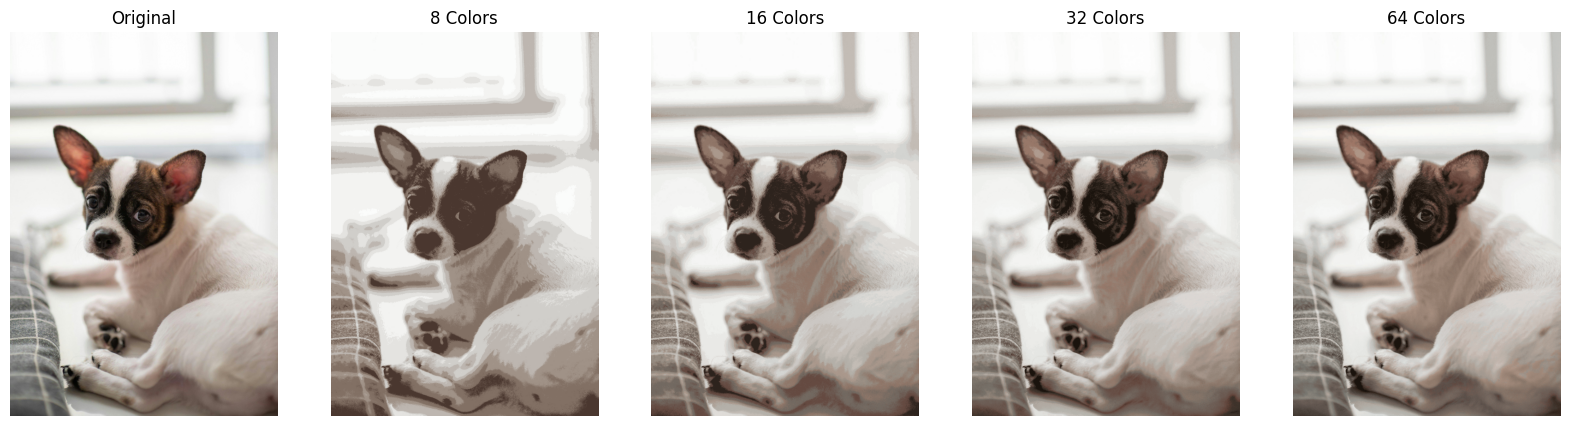

In [15]:
image_path = './dog.jpg'
img = Image.open(image_path)

def quantize_image(img, num_colors):
    img = img.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    return img.convert('RGB')

img_original = np.array(img)

quantized_images = [quantize_image(img, n) for n in [8, 16, 32, 64]]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(img_original)
axes[0].set_title('Original')
axes[0].axis('off')

for i, (ax, n) in enumerate(zip(axes[1:], [8, 16, 32, 64])):
    ax.imshow(quantized_images[i])
    ax.set_title(f'{n} Colors')
    ax.axis('off')

plt.show()

##### 对读入的彩色图像，使用matplotlib显示采样率为20，30，50下的图像

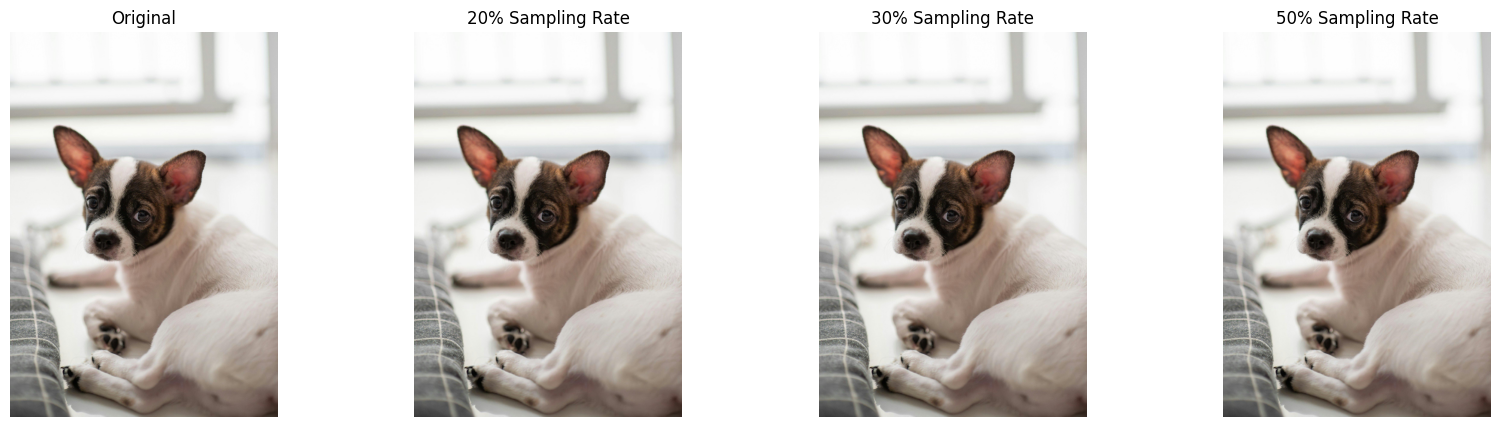

In [16]:
def downsample_image(img, scale):
    new_size = (int(img.width * scale), int(img.height * scale))
    return img.resize(new_size, Image.Resampling.LANCZOS)

img_original = np.array(img)

sampling_rates = [0.2, 0.3, 0.5]
downsampled_images = [downsample_image(img, scale) for scale in sampling_rates]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(img_original)
axes[0].set_title('Original')
axes[0].axis('off')

for i, (ax, scale) in enumerate(zip(axes[1:], sampling_rates)):
    ax.imshow(downsampled_images[i])
    ax.set_title(f'{int(scale*100)}% Sampling Rate')
    ax.axis('off')

plt.show()

##### 不同采样率和量化比下图像质量下降的区别

采样率是图像中每单位面积的像素数量。采样率降低的意思是像素数减少。  
量化比是图像可以使用的颜色数量。量化比下降的意思是图像中的颜色数减少。  
采样率减少会让图模糊，变成马赛克。想象同一部电影在影院和廉价显示屏上的区别。  
量化比下降会让图颜色不够丰富，过渡不自然。类比8bit音乐和现在的音乐。


##### 网络上检索CT图像或者xray图像，使用不同灰度级来对图像进行显示，最少使用多少灰度阶和采用率依然可以保持较好的视觉效果

据说6位灰度图像和50%采样率可以减少文件大小同时又保持较好的视觉效果

go check: https://github.com/Real1CM/ComputerVison.git